In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = [u'Simhei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [8]:
# 创建画布和格子
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
plt.show()

<Figure size 1280x800 with 0 Axes>

In [9]:
# 从标准正态分布中随机选取10000个样本
X = np.random.randn(10000)

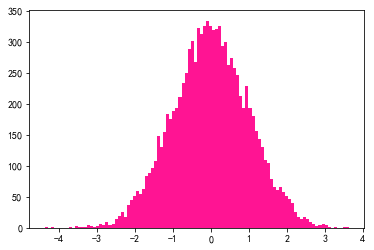

In [11]:
# 返回三个内容：每个箱子中含有多少个样本；在变量中划分出的箱子的宽度；用于创建直方图的补丁
n, bins, patches = plt.hist(x=X, bins=100, histtype='barstacked', orientation='vertical', color='deeppink')

In [12]:
n


array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,
         1.,   1.,   1.,   5.,   3.,   2.,   3.,   6.,   5.,   9.,   5.,
         6.,  14.,  19.,  25.,  18.,  37.,  45.,  51.,  59.,  54.,  63.,
        84.,  89.,  96., 108., 148., 130., 154., 184., 175., 189., 193.,
       211., 233., 250., 288., 301., 267., 323., 312., 326., 334., 326.,
       319., 321., 325., 294., 299., 262., 274., 258., 246., 212., 193.,
       229., 193., 181., 156., 144., 131., 109., 104.,  78.,  65.,  61.,
        66.,  58.,  51.,  47.,  40.,  25.,  17.,  14.,  17.,  14.,  10.,
         6.,   3.,   4.,   6.,   4.,   2.,   0.,   1.,   0.,   0.,   1.,
         1.])

In [13]:
bins

array([-4.37861381, -4.29850173, -4.21838966, -4.13827759, -4.05816552,
       -3.97805345, -3.89794137, -3.8178293 , -3.73771723, -3.65760516,
       -3.57749308, -3.49738101, -3.41726894, -3.33715687, -3.25704479,
       -3.17693272, -3.09682065, -3.01670858, -2.9365965 , -2.85648443,
       -2.77637236, -2.69626029, -2.61614821, -2.53603614, -2.45592407,
       -2.375812  , -2.29569993, -2.21558785, -2.13547578, -2.05536371,
       -1.97525164, -1.89513956, -1.81502749, -1.73491542, -1.65480335,
       -1.57469127, -1.4945792 , -1.41446713, -1.33435506, -1.25424298,
       -1.17413091, -1.09401884, -1.01390677, -0.93379469, -0.85368262,
       -0.77357055, -0.69345848, -0.61334641, -0.53323433, -0.45312226,
       -0.37301019, -0.29289812, -0.21278604, -0.13267397, -0.0525619 ,
        0.02755017,  0.10766225,  0.18777432,  0.26788639,  0.34799846,
        0.42811054,  0.50822261,  0.58833468,  0.66844675,  0.74855883,
        0.8286709 ,  0.90878297,  0.98889504,  1.06900711,  1.14

In [14]:
patches

<a list of 100 Patch objects>

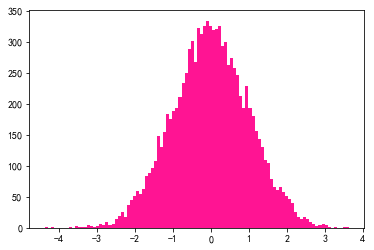

In [15]:
# 传统的条形直方图
n, bins, patches = plt.hist(x=X, bins=100, histtype='bar', orientation='vertical', color='deeppink')

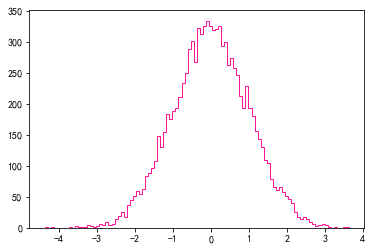

In [16]:
# 默认的未填充的线条轮廓
n, bins, patches = plt.hist(x=X, bins=100, histtype='step', orientation='vertical', color='deeppink')

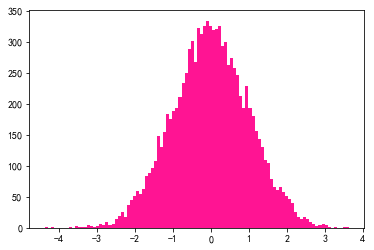

In [17]:
# 默认的填充的线条轮廓
n, bins, patches = plt.hist(x=X, bins=100, histtype='stepfilled', orientation='vertical', color='deeppink')

In [18]:
# 用于展示的数据
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

In [19]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]
[*zip(df.columns, name)]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

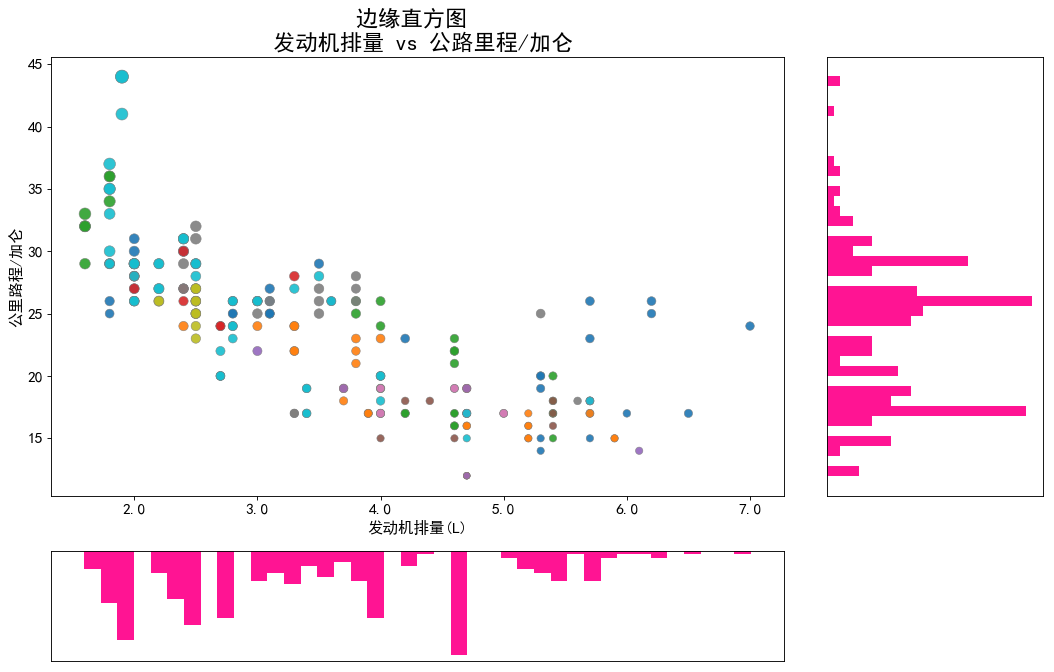

In [43]:
# 分割画布
fig = plt.figure(figsize=(16, 10), dpi=80, facecolor='white')
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 在分割完毕的画布上确认子图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])

ax_main.scatter('displ', 'hwy', 
                s=df.cty*4, 
                data=df, 
                c=df.manufacturer.astype('category').cat.codes, 
                cmap='tab10', 
                edgecolors='gray', 
                linewidth=0.5,
                alpha=0.9)

ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
# 让y轴方向，为了美观所以让分布图朝下分布
ax_bottom.invert_yaxis()

ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')
# plt.rcParams['font.sans-serif']=['Simhei']

ax_main.set(title='边缘直方图 \n 发动机排量 vs 公路里程/加仑', xlabel='发动机排量(L)', ylabel='公里路程/加仑')
ax_main.title.set_fontsize(20)

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14) #对所有横坐标纵坐标上的标题和标尺都设置字体

# 去掉下，右两个直方图的标尺 
for item in [ax_bottom,ax_right]:
    item.set_xticks([])
    item.set_yticks([])
# 让横坐标转化为带一位小数的浮点数
xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

In [24]:
df.manufacturer.astype('category').cat.codes

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
204    13
205    13
206    13
207    14
208    14
209    14
210    14
211    14
212    14
213    14
214    14
215    14
216    14
217    14
218    14
219    14
220    14
221    14
222    14
223    14
224    14
225    14
226    14
227    14
228    14
229    14
230    14
231    14
232    14
233    14
Length: 234, dtype: int8

In [41]:
ax_main.get_xticks()

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [44]:
# x轴；y轴；x轴标签；y轴标签
([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels())

[Text(0.5, 152.00505050505043, '发动机排量(L)'),
 Text(22.921875000000007, 0.5, '公里路程/加仑'),
 Text(1.0, 0, '1.0'),
 Text(2.0, 0, '2.0'),
 Text(3.0, 0, '3.0'),
 Text(4.0, 0, '4.0'),
 Text(5.0, 0, '5.0'),
 Text(6.0, 0, '6.0'),
 Text(7.0, 0, '7.0'),
 Text(8.0, 0, '8.0'),
 Text(0, 10.0, '10'),
 Text(0, 15.0, '15'),
 Text(0, 20.0, '20'),
 Text(0, 25.0, '25'),
 Text(0, 30.0, '30'),
 Text(0, 35.0, '35'),
 Text(0, 40.0, '40'),
 Text(0, 45.0, '45'),
 Text(0, 50.0, '50')]

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 07/50 边缘箱线图

In [45]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
#正态分布下的随机数
X1 = np.random.randn(1000)
#严重偏态分布下的随机数
X2 = np.random.randint(0,300,50).tolist() + np.random.randint(300,800,50).tolist() + np.random.randint(800,1000,900).tolist() 

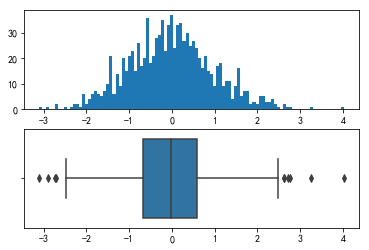

In [47]:
fig, (ax1, ax2) = plt.subplots(2)

# 直方图
ax1.hist(X1, bins=100)

sns.boxplot(x=X1, ax=ax2, orient='h', meanline=True)

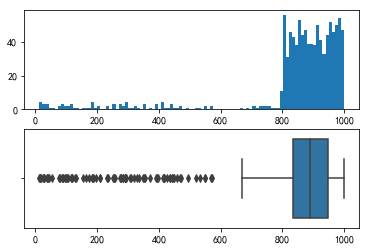

In [48]:
fig, (ax1, ax2) = plt.subplots(2)

# 直方图
ax1.hist(X2, bins=100)

sns.boxplot(x=X2, ax=ax2, orient='h', meanline=True)

In [49]:
# 上四分位 下四分位
Q3, Q1 = np.percentile(X2, [75, 25])

In [51]:
# 四分位距
iqr = Q3 - Q1
iqr

116.0

In [52]:
# 箱型图的最小值 
Q1 - 1.5 * iqr

659.0

In [53]:
# 箱型图认可的最大值
Q3 + 1.5 * iqr

1123.0

### 3. 导入数据，绘制图像

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

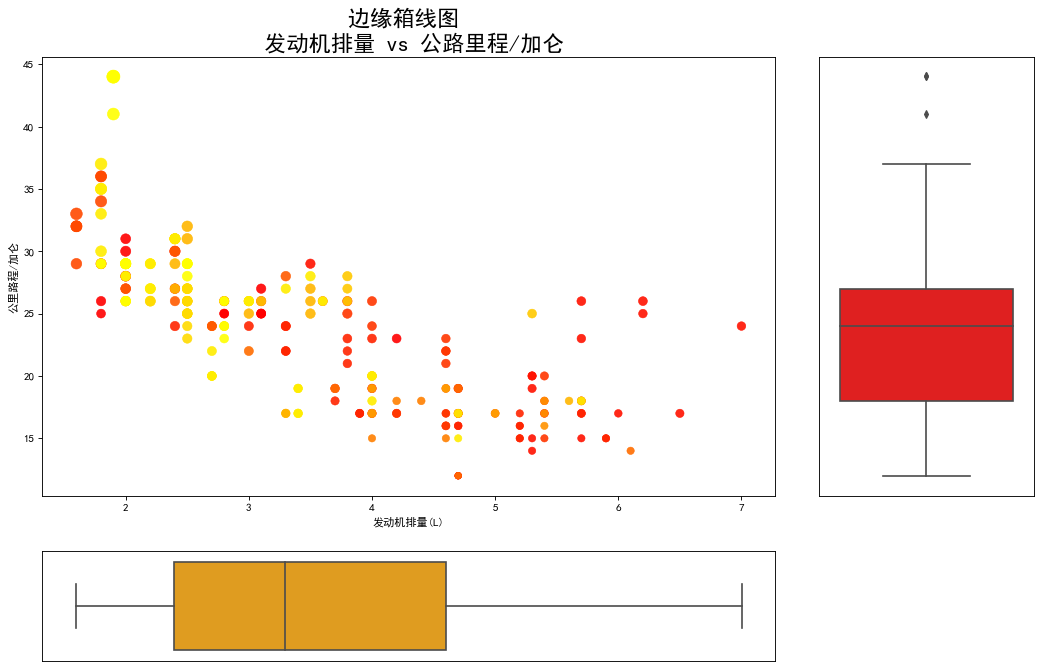

In [63]:
# 分割画布
fig = plt.figure(figsize=(16, 10), dpi=80, facecolor='white')
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)


# 在分割完毕的画布上确认子图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])

# 在中心绘制气泡图
ax_main.scatter('displ', 'hwy', 
                s=df.cty*4, 
                c=df.manufacturer.astype('category').cat.codes, 
                alpha=0.9, 
                data=df, 
                cmap='autumn',
                linewidths=0.5)

# 绘制下，右边缘箱型图
sns.boxplot(x=df.hwy, ax=ax_right, orient='v', color='red')
sns.boxplot(x=df.displ, ax=ax_bottom, orient='h', color='orange')
ax_right.set(ylabel='')
ax_bottom.set(xlabel='')

#设置标题，横坐标轴和纵坐标轴的名称
plt.rcParams['font.sans-serif']=['Simhei']
ax_main.set(title='边缘箱线图 \n 发动机排量 vs 公路里程/加仑', xlabel='发动机排量(L)', ylabel='公里路程/加仑')

# 将下和右边缘箱型图的坐标轴去掉
for item in [ax_right, ax_bottom]:
    item.set_xticks([])
    item.set_yticks([])

# 设置标题大小
ax_main.title.set_fontsize(20)

# 对所有的横纵坐标

plt.show()